In [1]:
# Import packages 

# Own packages form other places
import sys
sys.path.append('../Plotting/')
""" Now you can imprt modules in ../Plotting"""
import xyp_plot as xyp
sys.path.append('../SAMwrf/')
""" Now you can imprt modules in ../Plotting"""
import ana as a


# The usual suspects
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.colors as colors

from scipy import interpolate as intr


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Some useful packages 
import importlib
import copy
import time


importlib.reload(a)

<module 'ana' from '/glade/work/juliob/myPythonTools/GenlTools/../SAMwrf/ana.py'>

In [2]:
#ctopof='/glade/p/cgd/amp/pel/topo/cubedata/gmted2010_modis_bedmachine-ncube3000-220518.nc'

ctopof='/glade/work/juliob/Topo/Topo/regression-test-data/gmted2010_bedmachine-ncube0540-220518.nc'



In [3]:
ctopo=xr.open_dataset(ctopof)

In [4]:
print(list(ctopo.variables))

['grid_dims', 'lat', 'lon', 'terr', 'LANDFRAC', 'LANDM_COSLAT', 'var30']


In [5]:
clon=ctopo['lon'].values
clat=ctopo['lat'].values
terr=ctopo['terr'].values
print( clon.shape,
clat.shape,
terr.shape )


(1749600,) (1749600,) (1749600,)


In [42]:

tic = time.perf_counter()
terrx,Xlon,Ylat=a.c_o_xy(idata=terr,lon=clon,lat=clat,dx=0.1,dy=0.1,lonr=[220.,360.],latr=[-5,37],verbose=True )
toc = time.perf_counter()
InterpTime = f"Hi res topo interp in {toc - tic:0.4f} seconds"
print(InterpTime)

tic = time.perf_counter()
terrxH,XlonH,YlatH=a.c_o_xy(idata=terr,lon=clon,lat=clat,dx=0.1,dy=0.1,lonr=[240.,310.],latr=[0,33],verbose=True )
toc = time.perf_counter()
InterpTime = f"Hi res topo interp in {toc - tic:0.4f} seconds"
print(InterpTime)

 Interpolating .... 
Interp LONs from 220.0 to 360.0 at dx=  0.10 
Interp LATs from -5.0 to 37.0 at dy=  0.10 
created triangulation .... 
 interpolating 2D data 
Hi res topo interp in 23.2414 seconds
 Interpolating .... 
Interp LONs from 240.0 to 310.0 at dx=  0.10 
Interp LATs from  0.0 to 33.0 at dy=  0.10 
created triangulation .... 
 interpolating 2D data 
Hi res topo interp in 23.4010 seconds


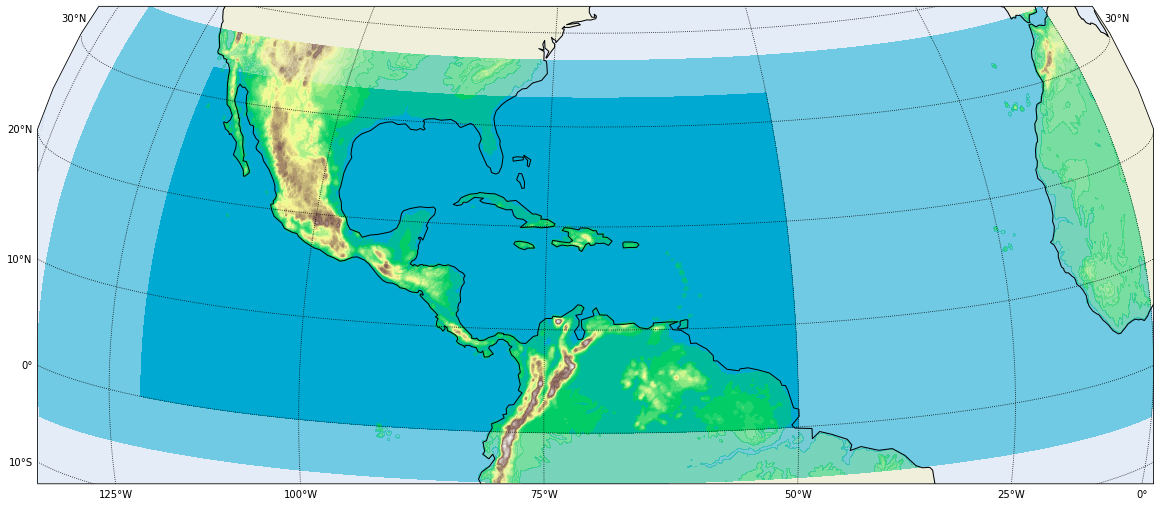

In [48]:


cmap=plt.cm.terrain
fig = plt.figure(figsize=(20, 20))

clevels=np.linspace(-1000,4100,31)

#ax1 = fig.add_subplot(1, 1, 1 , projection=ccrs.PlateCarree(central_longitude=0))
ax1 = fig.add_subplot(1, 1, 1 , projection=ccrs.Orthographic(central_longitude=-70,central_latitude=10 ))
#cf = ax1.contourf(Xlon, Ylat, terrx,  levels=clevels, cmap=cmap  , transform=ccrs.Orthographic(central_longitude=-85,central_latitude=20 )           )

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN,alpha=0.25)

cf = ax1.contourf(Xlon, Ylat, terrx,  levels=clevels, cmap=cmap  , transform=ccrs.PlateCarree(),alpha=.5)
cf = ax1.contourf(XlonH, YlatH, terrxH,  levels=clevels, cmap=cmap  , transform=ccrs.PlateCarree())

#ax1.add_feature(cfeature.RIVERS)


ax1.coastlines(resolution='110m')
    
gl=ax1.gridlines(linestyle=':', color='black',draw_labels=True)  #, ylabels_right=None)

#ax1.set_extent([-180, 20, -20., 40.], crs= ccrs.PlateCarree() )
#ax1.set_extent([0, 360, -89., 89.], crs= ccrs.PlateCarree() )


gl.right_labels=False
gl.top_labels=False
        
#plt.colorbar(cf , ax=ax1 , shrink=0.8)
